# **Encoding**

El primer paso es visualizar las variables categóricas:

In [129]:
import pandas as pd
import numpy as np
import pickle


import sys
import warnings
warnings.filterwarnings('ignore')

sys.path.append('../')
from src import funciones_encoding as fe

pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames


In [130]:
df = pd.read_csv("../datos/df_madrid_nonulls.csv", index_col=0)
df.reset_index(drop=True, inplace=True)
df[["rooms", "bathrooms", "exterior"]] = df[["rooms", "bathrooms", "exterior"]].astype("str")
df.head()

,price,propertyType,size,exterior,rooms,bathrooms,municipality,distance,floor,hasLift
0,750.0,flat,60.0,True,1,1,Madrid,7037,3,True
1,750.0,flat,70.0,True,2,1,San Sebastián de los Reyes,16145,bj,False
2,400.0,penthouse,67.0,True,2,2,Villamanrique de Tajo,55041,2,False
3,590.0,flat,70.0,True,3,2,Rascafría,56596,sin informacion,False
4,684.0,studio,45.0,True,0,1,Madrid,10656,sin informacion,sin informacion


In [131]:
df["municipality"].unique()

array(['Madrid', 'San Sebastián de los Reyes', 'Villamanrique de Tajo',
       'Rascafría', 'Manzanares el Real', 'Miraflores de la Sierra',
       'Galapagar', 'Arganda', 'San Lorenzo de el Escorial',
       'Aldea del Fresno', 'Aranjuez', 'Villanueva del Pardillo',
       'Las Rozas de Madrid', 'Navalcarnero', 'Alcalá de Henares',
       'El Escorial', 'Leganés', 'Coslada', 'Torrejón de Ardoz',
       'Camarma de Esteruelas', 'Alcorcón', 'Pinto', 'Valdemoro',
       'Collado Villalba', 'Getafe', 'Paracuellos de Jarama', 'El Molar',
       'Parla', 'Tres Cantos', 'Quijorna', 'Valdemorillo', 'Pedrezuela',
       'Daganzo de Arriba', 'Guadarrama', 'Cobeña', 'El Álamo', 'Algete',
       'Rivas-Vaciamadrid', 'Los Santos de la Humosa',
       'San Fernando de Henares', 'Fuenlabrada', 'Mataelpino',
       'Villa del Prado', 'Los Molinos', 'Colmenar Viejo', 'Móstoles',
       'Navalafuente', 'Meco', 'Robledo de Chavela', 'Campo Real',
       'Villaviciosa de Odón', 'Pozuelo de Alarcón', 'Bus

In [132]:
df.dtypes

price           float64
propertyType     object
size            float64
exterior         object
rooms            object
bathrooms        object
municipality     object
distance          int64
floor            object
hasLift          object
dtype: object

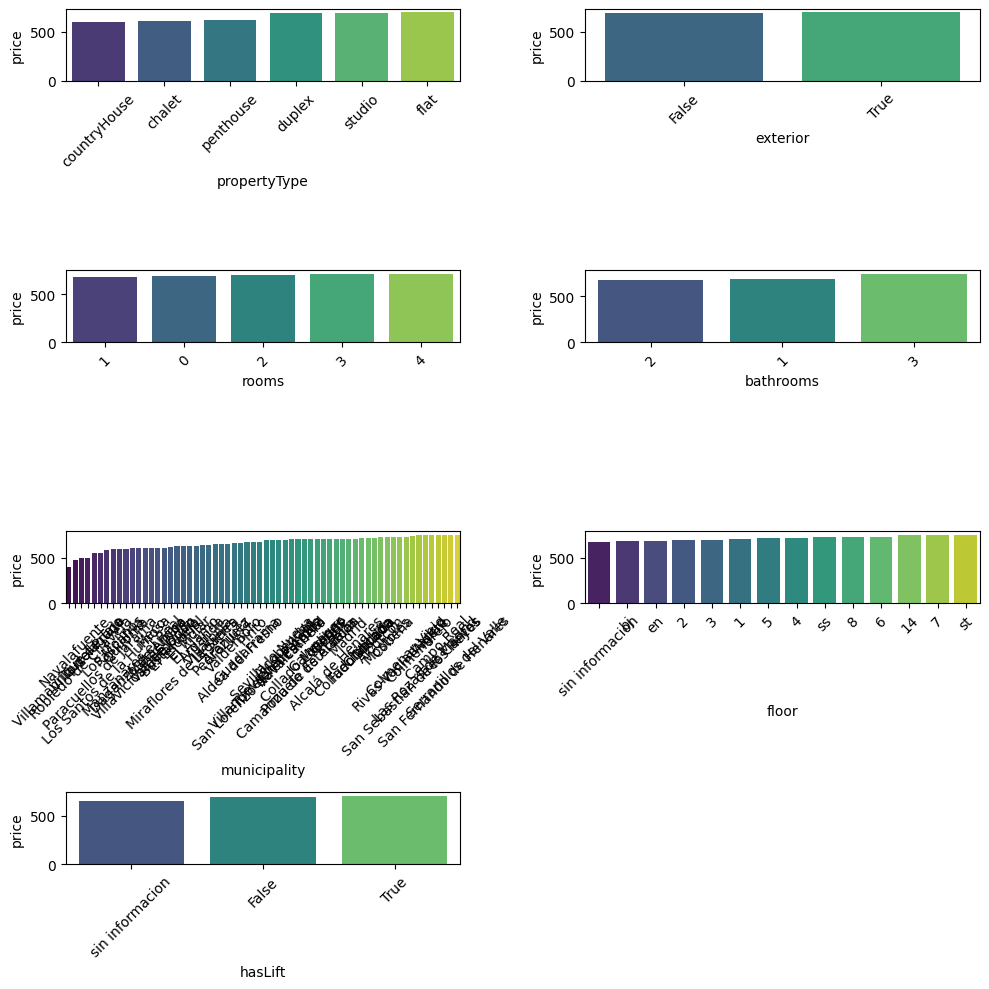

In [133]:
lista_col_categoricas = df.select_dtypes(exclude=np.number).columns
var_respuesta = "price"

analisis = fe.Analisis_Visual_Encoding(df, lista_col_categoricas, var_respuesta)
analisis.crear_barplot(tamano_grafica=(10, 10))

Para determinar que tipo de encoding vamos a utilizar primero debemos saber si las variables son nominales u ordinales, por lo que realizamos el A/B test para comprobarlo, puesto que en las gráficas a simple vista es complicado determinarlo.

In [134]:
# asuncion = fe.Asunciones(df, "price")

# for col in lista_col_categoricas:
#     print(f"Estamos analizando la variable {col.upper()}")
#     asuncion.identificar_normalidad(metodo = "kolmogorov") 
#     asuncion.identificar_homogeneidad(columna_categorica = col)
#     test = fe.TestEstadisticos(df, "price", col)
#     test.run_all_tests()
#     print("\n###########################\n")

⚠️ Hemos visto que no hay diferencias significativas en el precio para los distintos tipos de PROPERTYTYPE, sin embargo, teniendo en cuenta más variables puede ser que si que afecte por lo que le haremos one hot encoding y la mantendrmos, lo mismo para EXTERIOR, BATHROOMS y ROOMS. Sin embargo, este será un paso que igual hay que revisar si el modelo no sale tan bien como deseamos.

In [135]:
df.columns

Index(['price', 'propertyType', 'size', 'exterior', 'rooms', 'bathrooms',
       'municipality', 'distance', 'floor', 'hasLift'],
      dtype='object')

In [136]:
df

,price,propertyType,size,exterior,rooms,bathrooms,municipality,distance,floor,hasLift
0,750.0,flat,60.0,True,1,1,Madrid,7037,3,True
1,750.0,flat,70.0,True,2,1,San Sebastián de los Reyes,16145,bj,False
2,400.0,penthouse,67.0,True,2,2,Villamanrique de Tajo,55041,2,False
3,590.0,flat,70.0,True,3,2,Rascafría,56596,sin informacion,False
4,684.0,studio,45.0,True,0,1,Madrid,10656,sin informacion,sin informacion
...,...,...,...,...,...,...,...,...,...,...
347,640.0,flat,69.0,True,2,1,Villalbilla,29311,2,True
348,700.0,flat,54.0,True,1,1,Getafe,11656,1,True
349,700.0,flat,59.0,True,1,1,Madrid,7529,6,True
350,700.0,flat,75.0,True,2,1,Alcalá de Henares,30359,1,False


In [137]:
df[['rooms', 'bathrooms']]=df[['rooms', 'bathrooms']].astype("int")
df["hasLift"] = df["hasLift"].map({"True":1, "False":0, 'sin informacion': -1})

In [138]:
diccionario_encoding={"onehot":["propertyType", "exterior"], "target":['municipality', 'floor']}
var_respuesta = "price"
encoding = fe.Encoding(df, diccionario_encoding, var_respuesta)

In [139]:
df_ohe, one_hot_encoder = encoding.one_hot_encoding()
df_ohe.drop(columns=["propertyType", "exterior", "exterior_False"], inplace=True)
df_ohe.head()

,price,size,rooms,bathrooms,municipality,distance,floor,hasLift,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,exterior_True
0,750.0,60.0,1,1,Madrid,7037,3,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,750.0,70.0,2,1,San Sebastián de los Reyes,16145,bj,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,400.0,67.0,2,2,Villamanrique de Tajo,55041,2,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,590.0,70.0,3,2,Rascafría,56596,sin informacion,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,684.0,45.0,0,1,Madrid,10656,sin informacion,-1,0.0,0.0,0.0,0.0,0.0,1.0,1.0


⚠️El resto de las columnas cuyo orden importa vamos a probar a hacer el encoding con el target. Paso a revisar, pues igual es mejor el frecuency.

In [140]:
df_ohe_target, target_encoder = encoding.target_encoding()
df_ohe_target.head(3)

,price,size,rooms,bathrooms,municipality,distance,floor,hasLift,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,exterior_True
0,750.0,60.0,1,1,705.633132,7037,697.639893,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,750.0,70.0,2,1,701.404755,16145,678.663637,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,400.0,67.0,2,2,654.804079,55041,696.091764,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [141]:
df_ohe_target.dtypes

price                        float64
size                         float64
rooms                          int64
bathrooms                      int64
municipality                 float64
distance                       int64
floor                        float64
hasLift                        int64
propertyType_chalet          float64
propertyType_countryHouse    float64
propertyType_duplex          float64
propertyType_flat            float64
propertyType_penthouse       float64
propertyType_studio          float64
exterior_True                float64
dtype: object

Guardamos los encoders para las futuras predicciones:

In [142]:
with open('../datos/preprocesamiento/target_encoder.pkl', 'wb') as f:
    pickle.dump(target_encoder, f)

In [143]:
with open('../datos/preprocesamiento/one_hot_encoder.pkl', 'wb') as f:
    pickle.dump(one_hot_encoder, f)

Guardamos el df la con el encoding hecho:

In [144]:
df_ohe_target.to_csv("../datos/df_madrid_nonulls_encoded.csv")